# 기온 예측 <br>
30일을 입력값으로 사용 다음날 예측 <br>
설명변수 : 1일 ~30일까지의 날씨 <br>
목표변수 : 31일의 날씨

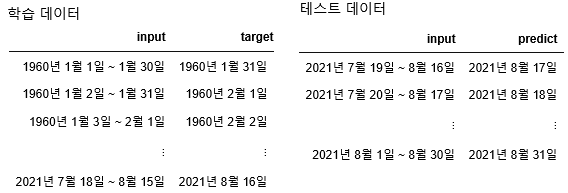

1.데이터 불러오기

In [127]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
# 2. 기온 데이터 불러오기
df = pd.read_csv("../../data/csv/temp_mean_gwangju.csv",
encoding="utf-8",
index_col=0) # 첫 번째 열(0번 열)을 인덱스(각 행의 고유 식별자)로 설정

In [129]:
df.head()

,1960_1_mean,1960_2_mean,1960_3_mean,1960_4_mean,1960_5_mean,1960_6_mean,1960_7_mean,1960_8_mean,1960_9_mean,1960_10_mean,...,2020_11_mean,2020_12_mean,2021_1_mean,2021_2_mean,2021_3_mean,2021_4_mean,2021_5_mean,2021_6_mean,2021_7_mean,2021_8_mean
0,2.7,1.7,7.9,3.6,13.5,17.3,24.0,27.1,24.9,18.8,...,12.4,4.3,-0.6,8.3,11.5,16.7,10.6,23.5,25.7,28.2
1,2.6,0.9,8.5,4.2,17.0,19.0,24.1,27.9,24.8,17.0,...,13.1,5.3,-0.3,-1.0,4.7,18.7,12.3,23.4,26.1,26.9
2,6.4,2.5,6.4,7.4,21.5,19.2,24.5,28.6,25.3,15.2,...,8.8,4.3,-0.6,0.3,6.2,16.8,15.6,19.8,23.7,27.0
3,10.9,0.8,8.4,8.2,17.6,18.0,25.4,28.8,22.2,16.6,...,7.9,3.3,1.2,1.6,6.9,11.0,17.4,20.0,23.1,28.6
4,-0.2,1.2,8.7,6.0,15.6,19.9,25.2,26.2,21.6,16.3,...,10.0,4.5,-0.2,2.8,10.7,12.4,15.0,20.9,21.9,28.8


2. 데이터 프레임 접근

In [130]:
# 행
df.iloc[0]


1960_1_mean     2.7
1960_2_mean     1.7
1960_3_mean     7.9
1960_4_mean     3.6
1960_5_mean    13.5
               ... 
2021_4_mean    16.7
2021_5_mean    10.6
2021_6_mean    23.5
2021_7_mean    25.7
2021_8_mean    28.2
Name: 0, Length: 740, dtype: float64

In [131]:
# 열 이름
df.columns  

# df.columns[0]

Index(['1960_1_mean', '1960_2_mean', '1960_3_mean', '1960_4_mean',
       '1960_5_mean', '1960_6_mean', '1960_7_mean', '1960_8_mean',
       '1960_9_mean', '1960_10_mean',
       ...
       '2020_11_mean', '2020_12_mean', '2021_1_mean', '2021_2_mean',
       '2021_3_mean', '2021_4_mean', '2021_5_mean', '2021_6_mean',
       '2021_7_mean', '2021_8_mean'],
      dtype='object', length=740)

In [132]:
# 열
df[df.columns[0]]



0      2.7
1      2.6
2      6.4
3     10.9
4     -0.2
5     -2.2
6     -0.3
7      2.2
8      4.1
9      5.3
10     2.0
11     0.4
12     1.8
13     3.0
14     1.5
15    -2.1
16    -3.4
17    -0.5
18     2.6
19     2.7
20    -0.3
21    -3.4
22    -7.2
23    -8.0
24    -3.9
25    -2.3
26    -4.8
27    -5.3
28    -2.0
29    -0.4
30     2.2
Name: 1960_1_mean, dtype: float64

3.EDA

In [133]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Columns: 740 entries, 1960_1_mean to 2021_8_mean
dtypes: float64(740)
memory usage: 179.5 KB


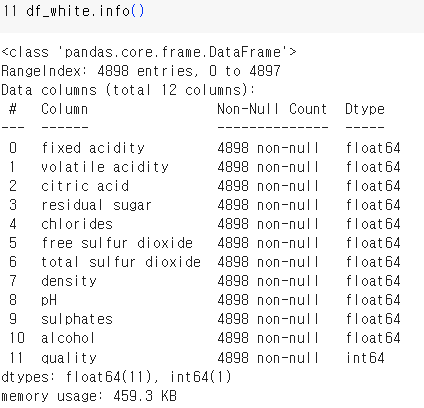

In [134]:
# help(pd.DataFrame.info)
# pd.DataFrame.info?

In [135]:
df.describe() # 통계적 요약 정보 제공


,1960_1_mean,1960_2_mean,1960_3_mean,1960_4_mean,1960_5_mean,1960_6_mean,1960_7_mean,1960_8_mean,1960_9_mean,1960_10_mean,...,2020_11_mean,2020_12_mean,2021_1_mean,2021_2_mean,2021_3_mean,2021_4_mean,2021_5_mean,2021_6_mean,2021_7_mean,2021_8_mean
count,31.000000,29.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000,17.000000,31.000000,...,30.000000,31.000000,31.000000,28.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000
mean,0.132258,3.203448,8.464516,10.903333,16.564516,21.676667,26.380645,26.622581,21.176471,15.503226,...,10.540000,2.658065,1.438710,5.142857,10.635484,14.896667,18.380645,23.290000,27.041935,25.829032
std,4.020894,2.840835,3.600236,3.901325,2.371715,2.212610,1.467746,1.610116,2.464632,2.283927,...,3.707923,3.212245,5.317059,4.566742,2.664901,3.158730,3.096925,1.498816,2.018048,1.545573
min,-8.000000,-1.300000,0.700000,3.600000,12.100000,17.300000,23.300000,23.600000,17.600000,10.500000,...,4.400000,-5.100000,-9.900000,-4.500000,4.700000,9.400000,10.600000,19.800000,21.900000,22.700000
25%,-2.250000,0.900000,6.400000,8.300000,14.700000,20.525000,25.300000,25.150000,19.300000,13.800000,...,8.225000,1.050000,-1.400000,1.675000,8.950000,12.500000,16.350000,22.850000,25.850000,24.950000
50%,-0.200000,2.500000,8.200000,10.750000,16.900000,21.500000,26.800000,27.100000,20.200000,15.800000,...,10.000000,3.500000,0.600000,4.350000,10.600000,14.400000,18.100000,23.400000,27.800000,25.700000
75%,2.600000,5.500000,10.900000,13.450000,18.000000,23.175000,27.300000,28.050000,23.400000,17.000000,...,13.000000,5.100000,6.350000,9.325000,12.350000,17.250000,21.000000,24.075000,28.700000,26.750000
max,10.900000,9.700000,16.000000,18.100000,21.500000,25.600000,28.600000,28.800000,25.300000,19.000000,...,19.700000,7.000000,9.400000,13.000000,15.300000,21.300000,23.700000,26.000000,29.100000,28.800000


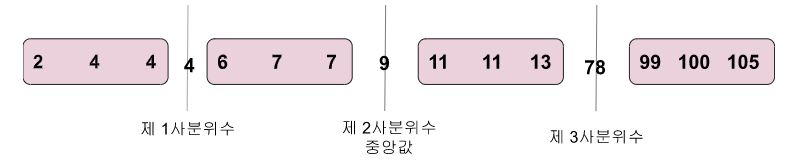

In [136]:
df.head()

,1960_1_mean,1960_2_mean,1960_3_mean,1960_4_mean,1960_5_mean,1960_6_mean,1960_7_mean,1960_8_mean,1960_9_mean,1960_10_mean,...,2020_11_mean,2020_12_mean,2021_1_mean,2021_2_mean,2021_3_mean,2021_4_mean,2021_5_mean,2021_6_mean,2021_7_mean,2021_8_mean
0,2.7,1.7,7.9,3.6,13.5,17.3,24.0,27.1,24.9,18.8,...,12.4,4.3,-0.6,8.3,11.5,16.7,10.6,23.5,25.7,28.2
1,2.6,0.9,8.5,4.2,17.0,19.0,24.1,27.9,24.8,17.0,...,13.1,5.3,-0.3,-1.0,4.7,18.7,12.3,23.4,26.1,26.9
2,6.4,2.5,6.4,7.4,21.5,19.2,24.5,28.6,25.3,15.2,...,8.8,4.3,-0.6,0.3,6.2,16.8,15.6,19.8,23.7,27.0
3,10.9,0.8,8.4,8.2,17.6,18.0,25.4,28.8,22.2,16.6,...,7.9,3.3,1.2,1.6,6.9,11.0,17.4,20.0,23.1,28.6
4,-0.2,1.2,8.7,6.0,15.6,19.9,25.2,26.2,21.6,16.3,...,10.0,4.5,-0.2,2.8,10.7,12.4,15.0,20.9,21.9,28.8


In [137]:
# 하위 5개
df.tail()

,1960_1_mean,1960_2_mean,1960_3_mean,1960_4_mean,1960_5_mean,1960_6_mean,1960_7_mean,1960_8_mean,1960_9_mean,1960_10_mean,...,2020_11_mean,2020_12_mean,2021_1_mean,2021_2_mean,2021_3_mean,2021_4_mean,2021_5_mean,2021_6_mean,2021_7_mean,2021_8_mean
26,-4.8,3.6,6.0,17.0,19.5,25.0,27.9,24.8,NaN,10.5,...,7.7,5.2,5.1,9.4,14.7,16.6,16.8,24.7,28.3,23.5
27,-5.3,3.3,12.7,14.3,15.9,25.6,28.3,26.1,NaN,12.6,...,5.1,5.8,0.7,8.9,12.4,17.9,17.9,22.8,28.9,25.1
28,-2.0,5.5,16.0,13.0,16.8,23.9,28.6,25.4,NaN,13.4,...,4.5,3.3,-3.2,NaN,13.1,17.4,19.4,23.2,29.0,25.5
29,-0.4,NaN,15.2,15.4,16.8,25.2,28.1,23.6,NaN,14.4,...,4.4,-5.1,1.8,NaN,14.0,14.7,22.1,23.9,28.1,25.5
30,2.2,NaN,5.8,NaN,17.2,NaN,28.3,24.3,NaN,13.4,...,NaN,-4.3,6.2,NaN,15.3,NaN,23.7,NaN,29.1,26.5


In [138]:
df['1960_1_mean'].mean()
# df.iloc[:, 0].mean()  # df의 첫 번째 열에 있는 모든 값의 평균값을 계산

0.13225806451612884

In [139]:
# 결측치 확인
df.isnull();

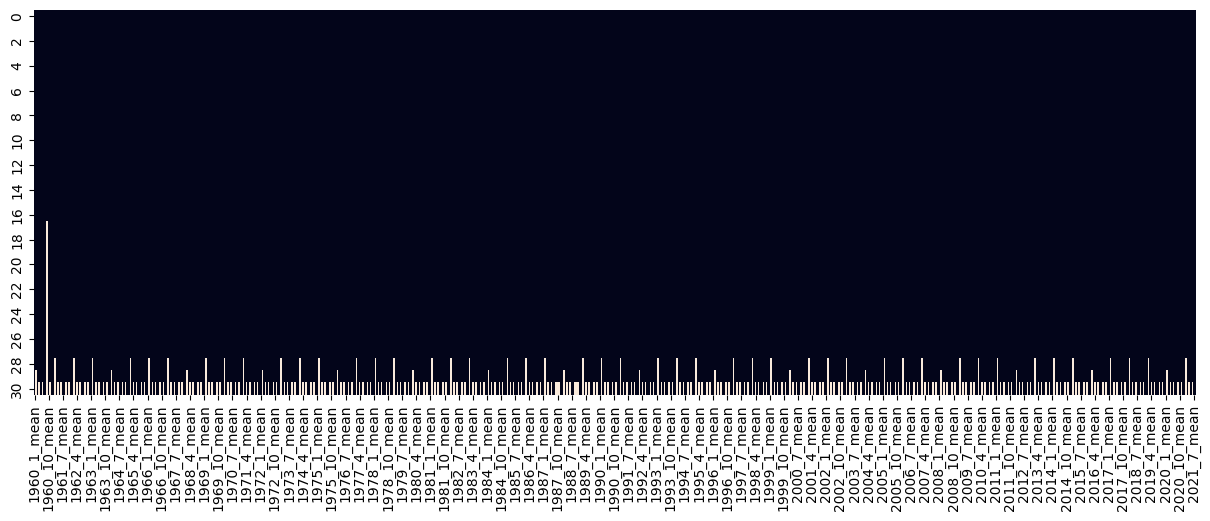

In [140]:
# 결측치 시각화
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar=False,);  
plt.show()

전처리

In [141]:
# 결측치 처리 ... 어떻게?
df_fillna = df.copy()

In [142]:
df_fillna.fillna(method='ffill').tail(3)

,1960_1_mean,1960_2_mean,1960_3_mean,1960_4_mean,1960_5_mean,1960_6_mean,1960_7_mean,1960_8_mean,1960_9_mean,1960_10_mean,...,2020_11_mean,2020_12_mean,2021_1_mean,2021_2_mean,2021_3_mean,2021_4_mean,2021_5_mean,2021_6_mean,2021_7_mean,2021_8_mean
28,-2.0,5.5,16.0,13.0,16.8,23.9,28.6,25.4,17.6,13.4,...,4.5,3.3,-3.2,8.9,13.1,17.4,19.4,23.2,29.0,25.5
29,-0.4,5.5,15.2,15.4,16.8,25.2,28.1,23.6,17.6,14.4,...,4.4,-5.1,1.8,8.9,14.0,14.7,22.1,23.9,28.1,25.5
30,2.2,5.5,5.8,15.4,17.2,25.2,28.3,24.3,17.6,13.4,...,4.4,-4.3,6.2,8.9,15.3,14.7,23.7,23.9,29.1,26.5


시각화

In [143]:
df.describe()

,1960_1_mean,1960_2_mean,1960_3_mean,1960_4_mean,1960_5_mean,1960_6_mean,1960_7_mean,1960_8_mean,1960_9_mean,1960_10_mean,...,2020_11_mean,2020_12_mean,2021_1_mean,2021_2_mean,2021_3_mean,2021_4_mean,2021_5_mean,2021_6_mean,2021_7_mean,2021_8_mean
count,31.000000,29.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000,17.000000,31.000000,...,30.000000,31.000000,31.000000,28.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000
mean,0.132258,3.203448,8.464516,10.903333,16.564516,21.676667,26.380645,26.622581,21.176471,15.503226,...,10.540000,2.658065,1.438710,5.142857,10.635484,14.896667,18.380645,23.290000,27.041935,25.829032
std,4.020894,2.840835,3.600236,3.901325,2.371715,2.212610,1.467746,1.610116,2.464632,2.283927,...,3.707923,3.212245,5.317059,4.566742,2.664901,3.158730,3.096925,1.498816,2.018048,1.545573
min,-8.000000,-1.300000,0.700000,3.600000,12.100000,17.300000,23.300000,23.600000,17.600000,10.500000,...,4.400000,-5.100000,-9.900000,-4.500000,4.700000,9.400000,10.600000,19.800000,21.900000,22.700000
25%,-2.250000,0.900000,6.400000,8.300000,14.700000,20.525000,25.300000,25.150000,19.300000,13.800000,...,8.225000,1.050000,-1.400000,1.675000,8.950000,12.500000,16.350000,22.850000,25.850000,24.950000
50%,-0.200000,2.500000,8.200000,10.750000,16.900000,21.500000,26.800000,27.100000,20.200000,15.800000,...,10.000000,3.500000,0.600000,4.350000,10.600000,14.400000,18.100000,23.400000,27.800000,25.700000
75%,2.600000,5.500000,10.900000,13.450000,18.000000,23.175000,27.300000,28.050000,23.400000,17.000000,...,13.000000,5.100000,6.350000,9.325000,12.350000,17.250000,21.000000,24.075000,28.700000,26.750000
max,10.900000,9.700000,16.000000,18.100000,21.500000,25.600000,28.600000,28.800000,25.300000,19.000000,...,19.700000,7.000000,9.400000,13.000000,15.300000,21.300000,23.700000,26.000000,29.100000,28.800000


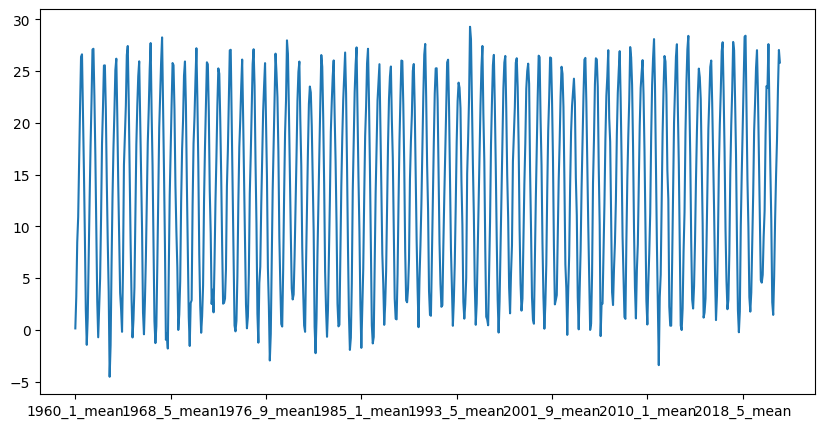

In [144]:
# 평균 시각화
plt.figure(figsize=(10,5))
# plt.title("Gwangju Temperature")
df.mean().plot();

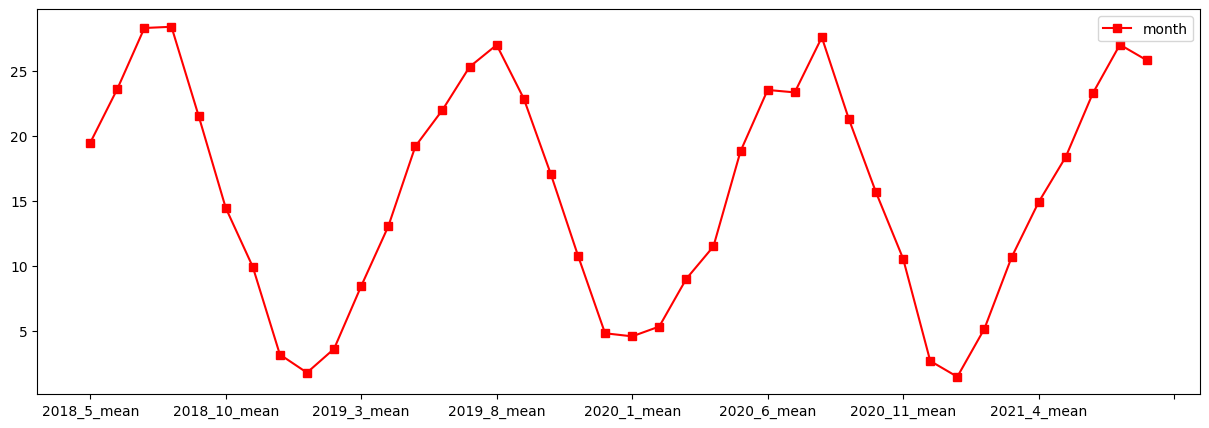

In [145]:
plt.figure(figsize=(15,5))
df.mean()[700:].plot(marker="s", color="red", label="month")
# plt.ylabel("Temperature")
# plt.xlabel("time")
plt.legend();

전처리 <br>
1. Data frame transpose <br>
2. NaN 제거 <br>
3. 입력 기간과 예측 기간에 따른 데이터 전처리

In [146]:
####  NaN 제거
temp_include_nan = df.T.values.flatten() # df의 행과 열을 바꾼 후, 이를 1차원 배열로 평탄화(flatten)... 1줄로 나열


In [147]:
temp = temp_include_nan[~np.isnan(temp_include_nan)]

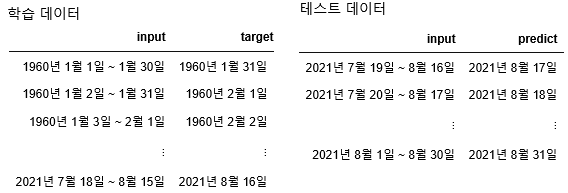

In [148]:
# 입력 기간
steps = 30
# 예측 기간
forecast_terms = 15

# 파이썬의 리스트 컴프리헨션(list comprehension)을 사용하여 temp 배열에서 여러 부분 시퀀스(subsequences)를 추출하는 코드
#‘리스트를 쉽게, 짧게 한 줄로
x_train = np.array([temp[i:i+steps] for i in range(len(temp)-forecast_terms-steps)])
y_train = temp[steps:len(temp)-forecast_terms]

x_test = np.array([temp[-(steps+forecast_terms)+i:-forecast_terms+i]
	for i in range(forecast_terms)])

y_test = temp[-forecast_terms:]

ML을 통한 예측 분석 실행
모델 설계 학습 - Keras


In [149]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [150]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)


x_train:  (22464, 30)
y_train:  (22464,)
x_test:  (15, 30)
y_test:  (15,)


<b>단층 신경망</b> <br>
기온 예측.... 회귀 or  분류? <br>

In [151]:
###  신경망 설계
# 입력노드 수
input_node = 30
# 출력노드 수
output_node = 1

# 모델
model_simple = Sequential()
  # Sequential model 인스턴스 생성
  # 딥러닝 모델의 한 형태, 여러 층(Layers)을 순서대로 쌓아 올려 구성

model_simple.add(Dense(output_node, input_shape=(input_node,))) # 단층 신경망을 구성


model_simple.compile(loss="mse",
optimizer="adam")
# compile: 학습 과정을 구성, 모델 학습을 정의(손실 함수, 최적화 알고리즘, 평가 지표 정의)

In [152]:
model_simple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 모델 학습
model_simple_hist = model_simple.fit(x_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
180/180 [==============================] - 1s 4ms/step - loss: 38.3774 - val_loss: 20.9122
Epoch 2/10
180/180 [==============================] - 0s 3ms/step - loss: 19.6547 - val_loss: 19.4958
Epoch 3/10
180/180 [==============================] - 0s 2ms/step - loss: 18.1568 - val_loss: 17.9047
Epoch 4/10
180/180 [==============================] - 0s 3ms/step - loss: 16.5504 - val_loss: 16.2637
Epoch 5/10
180/180 [==============================] - 0s 2ms/step - loss: 14.9662 - val_loss: 14.6466
Epoch 6/10
180/180 [==============================] - 0s 3ms/step - loss: 13.4561 - val_loss: 13.1754
Epoch 7/10
180/180 [==============================] - 0s 2ms/step - loss: 12.0887 - val_loss: 11.8563
Epoch 8/10
180/180 [==============================] - 0s 2ms/step - loss: 10.8836 - val_loss: 10.7031
Epoch 9/10
180/180 [==============================] - 0s 2ms/step - loss: 9.8437 - val_loss: 9.7292
Epoch 10/10
180/180 [==============================] - 0s 2ms/step - loss: 8.9615 - 

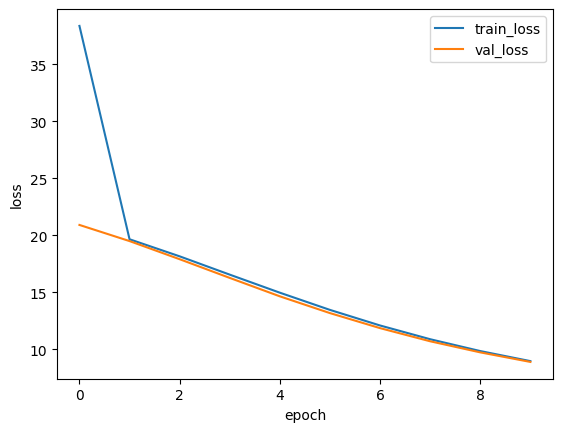

In [154]:
# 학습 과정 시각화
plt.plot(model_simple_hist.history["loss"], label="train_loss")
plt.plot(model_simple_hist.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend();



In [155]:
pred_simple = model_simple.predict(x_test).flatten()

1/1 [==============================] - 0s 33ms/step


In [156]:
# 모델 평가
np.abs(y_test - pred_simple)

array([0.6873455 , 3.61694221, 1.64850311, 0.50235634, 0.41822052,
       2.53304176, 0.14662895, 0.43007164, 1.20858307, 3.20194893,
       1.257967  , 0.16155586, 2.43401718, 0.13424873, 2.272192  ])

In [157]:
# 예측 정확도
# 기온 예측의 정확도를 0.5를 기준으로 설정
# 기준점은 분석가의 재량(도메인 지식 반영)으로 조정 하는 영역임

acc = np.sum(np.abs(y_test - pred_simple) <= 0.5)/len(y_test)
acc_train = np.sum(np.abs(y_train - model_simple.predict(x_train).flatten()) <= 0.5)/len(y_train)

print("단층 신경망 테스트 데이터 정확도: ", np.round(acc*100, 2),"%")
print("단층 신경망 훈련 데이터 정확도: ", np.round(acc_train*100, 2),"%")

702/702 [==============================] - 1s 901us/step
단층 신경망 테스트 데이터 정확도:  33.33 %
단층 신경망 훈련 데이터 정확도:  15.3 %


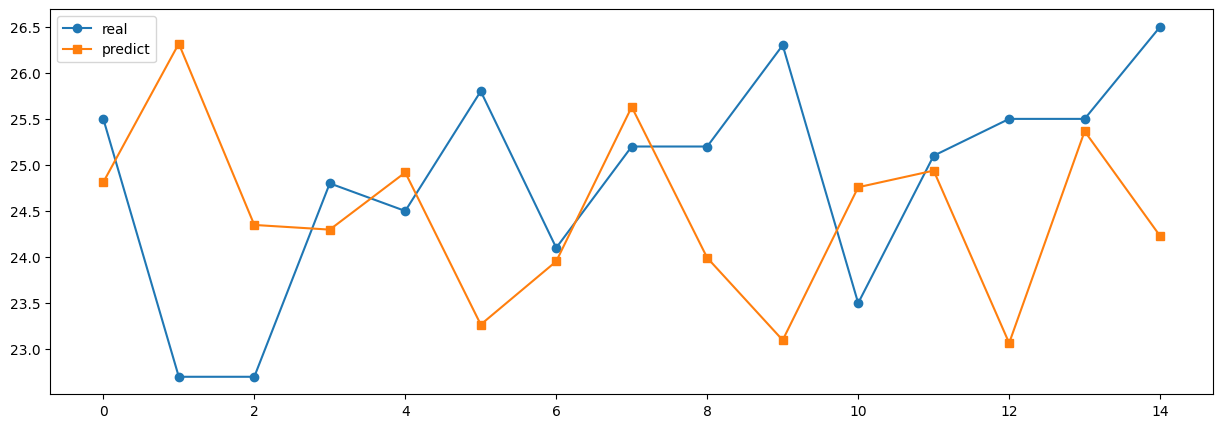

In [158]:
plt.figure(figsize=(15,5))
plt.plot(y_test, c="C0", marker="o", label="real")
plt.plot(pred_simple, c="C1", marker="s", label="predict")
# plt.xticks(range(15), labels=list(range(17,32)))
plt.legend();


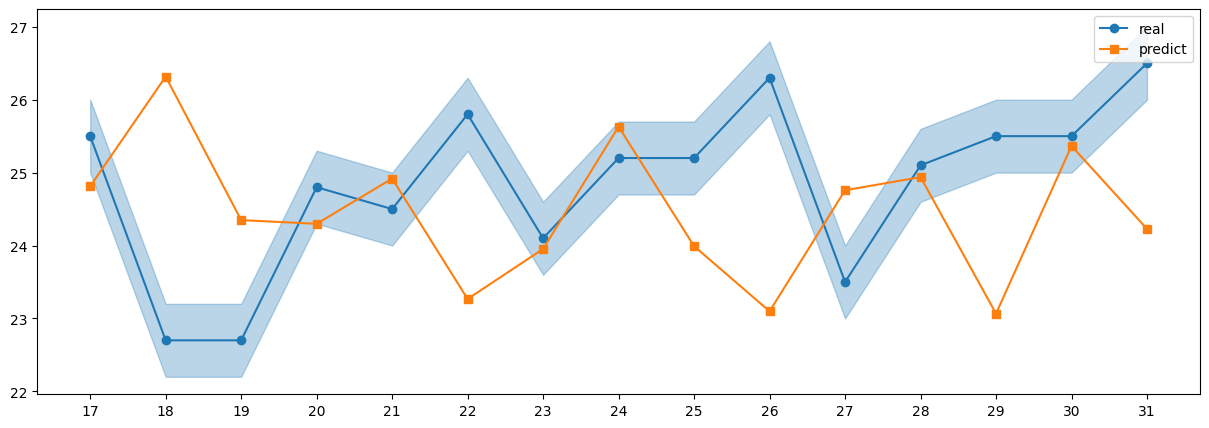

In [159]:
#정답 범위를 포함 한 시각화 

plt.figure(figsize=(15,5))
plt.plot(y_test, c="C0", marker="o", label="real")

#정답 범위
plt.fill_between(range(15), y_test-0.5, y_test+0.5, color="C0", alpha=0.3)

plt.plot(pred_simple, c="C1", marker="s", label="predict")
plt.xticks(range(15), labels=list(range(17,32)))
plt.legend();
